In [3]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
parent = os.path.join(Path(os.getcwd()).parent)

sys.path.append(parent)

from utils.results import SimulationResults

In [14]:
# load in results
results_folder = Path(r"P:\11210070-usgscoop-202324-arcticxb\runs\val_gt1")
fname = "ground_temperature_timeseries.csv"

df = pd.read_csv(os.path.join(results_folder, fname), parse_dates=['time'])

df.head()

KeyboardInterrupt: 

In [ ]:
# only select center node


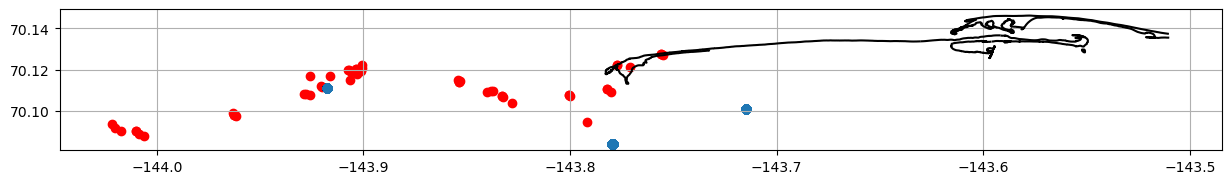

In [13]:
# load in Erikson data

df = pd.read_csv(os.path.join(parent, Path(r"database\raw_datasets\erikson\Groundtemperatu\BTI_2011TimeSeriesData_GroundTemperature.csv")))

df.head()

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2


In [6]:
# the blue points are the points with data

p1 = (-143.77901, 70.08405)  # main land
p2 = (-143.71484, 70.10072)  # main land, but a bit north-eastward
p3 = (-143.91774, 70.11128)  # Arey Island

